# Base
## Estimation of Obesity Levels Based On Eating Habits and Physical Condition

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

## Perguntas?
- Metas mínimas para manter qualidade de vida (atividade física, alimentação, consumo de bebidas, etc)
- Quais fatores mais contribuem para o desenvolvimento da obesidade (por exemplo, histórico familiar, consumo de alimentos calóricos, ou hábitos de transporte)?
- Identificar grupos padrões de comportamento similares em relação à alimentação, atividade física, uso de tecnologia, nível de obesidade 

### Dicionario:

- Gender: Gênero do indivíduo.
- Age: Idade do indivíduo.
- Height: Altura do indivíduo (em metros).
- Weight: Peso do indivíduo (em quilogramas).
- FAVC: Frequent consumption of high caloric food (Consumo frequente de alimentos calóricos).
- FCVC: Frequency of consumption of vegetables (Frequência de consumo de vegetais).
- NCP: Number of main meals per day (Número de refeições principais por dia).
- CAEC: Consumption of food between meals (Consumo de alimentos entre as refeições).
- SMOKE: Smoking habit (Hábito de fumar).
- CH2O: Daily water consumption (Consumo diário de água).
- SCC: Self-control of calorie intake (Controle próprio de ingestão calórica).
- FAF: Physical activity frequency (Frequência de atividade física).
- TUE: Time spent using electronic devices (Tempo de uso de dispositivos eletrônicos).
- CALC: Alcohol consumption frequency (Frequência de consumo de álcool).
- MTRANS: Mode of transportation (Modo de transporte).
- NObeyesdad: Obesity level (Nível de obesidade).

## Importando bibliotecas e base de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('../projeto_datasicence_coderhouse/dados/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
# renomeando as colunas
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Data Wrangling

In [5]:
# Validando valores nulos
df.isnull().sum()

Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

In [6]:
# validação e tratamento de valores duplicados
print(f'Quantidade de duplicados: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'Quantidade de duplicados: {df.duplicated().sum()}')

Quantidade de duplicados: 24
Quantidade de duplicados: 0


In [7]:
df.shape

(2087, 17)

In [8]:
# primeiras manipulações

df['Height'] = df['Height'].apply(lambda x: x * 100)  # convertendo a altura para centímetros
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(0)
df['Obese'] = df['Obesity'].map({'Insufficient_Weight': 0, 'Normal_Weight': 0, 'Overweight_Level_I': 0, 'Overweight_Level_II': 1, 'Obesity_Type_I': 1, 'Obesity_Type_II': 1, 'Obesity_Type_III': 1})
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity,Obese
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1


In [9]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food',
       'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of food between meals', 'Smoke',
       'Consumption of water daily', 'Calories consumption monitoring',
       'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity', 'Obese'],
      dtype='object')

In [10]:
df1 = df.copy() # nesse df trabalharemos sem a transformação das variáveis qualitativas

In [11]:
df2 = df.copy() # nesse df trabalharemos com a transformação das variáveis qualitativas

In [12]:
### Transformando Variáveis Qualitativas em Quantitativas

df2['Smoker'] = df['Smoke'].map({'no': 0, 'yes': 1})
df2['Alcohol'] = df['Consumption of alcohol'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df2['Food Bt Meals'] = df['Consumption of food between meals'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df2['Mobility'] = df['Transportation used'].map({'Automobile': 0, 'Motorbike': 0, 'Public_Transportation': 0.5, 'Bike': 1, 'Walking': 1}) # nível de atividade física para deslocamento
df2['Obesity F'] = df['Family History with Overweight'].map({'no': 0, 'yes': 1})
df2['Bad Food'] = df['Frequent consumption of high caloric food'].map({'no': 0, 'yes': 1}) # "Frequent consumption of high caloric food between meals"
df2['Calories Control'] = df['Calories consumption monitoring'].map({'no': 0, 'yes': 1}) # "Self control of eating habits"
df2['BMI'] = round(df2['Weight'] / (df2['Height'] / 100) ** 2, 2)
df2.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,...,Obesity,Obese,Smoker,Alcohol,Food Bt Meals,Mobility,Obesity F,Bad Food,Calories Control,BMI
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,0,0,0,1,0.5,1,0,0,24.39
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Normal_Weight,0,1,1,1,0.5,1,0,1,24.24
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,0,0,2,1,0.5,1,0,0,23.77
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,...,Overweight_Level_I,0,0,2,1,1.0,0,0,0,26.85
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,...,Overweight_Level_II,1,0,1,1,0.5,0,0,0,28.34


In [13]:
# Identificando os valores min/max relacionados aos hábitos

for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Physical activity frequency', 'Time using technology devices', 'Consumption of water daily']:
    value = np.array(df[x])
    print(f'{x}: Max: {value.max()}, Min: {value.min()}')

Frequency of consumption of vegetables: Max: 3.0, Min: 1.0
Number of main meals: Max: 4.0, Min: 1.0
Physical activity frequency: Max: 3.0, Min: 0.0
Time using technology devices: Max: 2.0, Min: 0.0
Consumption of water daily: Max: 3.0, Min: 1.0


In [14]:
# Normalizando as variáveis contínuas
continuous_vars = ['Frequency of consumption of vegetables', 'Number of main meals', 'Physical activity frequency', 'Time using technology devices', 'Consumption of water daily', 'Alcohol', 'Smoker', 'Food Bt Meals', 'Mobility', 'Obesity F', 'Bad Food', 'Calories Control']
scaler = MinMaxScaler()
df2[continuous_vars] = scaler.fit_transform(df2[continuous_vars])
df2.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,...,Obesity,Obese,Smoker,Alcohol,Food Bt Meals,Mobility,Obesity F,Bad Food,Calories Control,BMI
0,Female,21.0,162.0,64.0,yes,no,0.5,0.666667,Sometimes,no,...,Normal_Weight,0,0.0,0.000000,0.333333,0.5,1.0,0.0,0.0,24.39
1,Female,21.0,152.0,56.0,yes,no,1.0,0.666667,Sometimes,yes,...,Normal_Weight,0,1.0,0.333333,0.333333,0.5,1.0,0.0,1.0,24.24
2,Male,23.0,180.0,77.0,yes,no,0.5,0.666667,Sometimes,no,...,Normal_Weight,0,0.0,0.666667,0.333333,0.5,1.0,0.0,0.0,23.77
3,Male,27.0,180.0,87.0,no,no,1.0,0.666667,Sometimes,no,...,Overweight_Level_I,0,0.0,0.666667,0.333333,1.0,0.0,0.0,0.0,26.85
4,Male,22.0,178.0,89.8,no,no,0.5,0.000000,Sometimes,no,...,Overweight_Level_II,1,0.0,0.333333,0.333333,0.5,0.0,0.0,0.0,28.34


# EDA

## DF 2 - Dados qualitativos convertidos

In [15]:
df2.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.356,6.380,14.00,20.000,23.000,26.000,61.00
Height,2087.0,170.267,9.319,145.00,163.000,170.200,176.900,198.00
Weight,2087.0,86.859,26.191,39.00,66.000,83.100,108.000,173.00
Frequency of consumption of vegetables,2087.0,0.711,0.267,0.00,0.500,0.698,1.000,1.00
Number of main meals,2087.0,0.567,0.255,0.00,0.566,0.667,0.667,1.00
Consumption of water daily,2087.0,0.502,0.304,0.00,0.295,0.500,0.733,1.00
Physical activity frequency,2087.0,0.338,0.284,0.00,0.042,0.333,0.559,1.00
Time using technology devices,2087.0,0.332,0.304,0.00,0.000,0.315,0.500,1.00
Obese,2087.0,0.605,0.489,0.00,0.000,1.000,1.000,1.00
Smoker,2087.0,0.021,0.144,0.00,0.000,0.000,0.000,1.00


In [16]:
df2.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food',
       'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of food between meals', 'Smoke',
       'Consumption of water daily', 'Calories consumption monitoring',
       'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity', 'Obese',
       'Smoker', 'Alcohol', 'Food Bt Meals', 'Mobility', 'Obesity F',
       'Bad Food', 'Calories Control', 'BMI'],
      dtype='object')

In [17]:
# Distribuição dos níveis de Obesidade
obesity_counts = df["Obesity"].value_counts(normalize=True).round(4) * 100
obesity_counts

Obesity
Obesity_Type_I         16.82
Obesity_Type_III       15.52
Obesity_Type_II        14.23
Overweight_Level_II    13.90
Normal_Weight          13.51
Overweight_Level_I     13.22
Insufficient_Weight    12.79
Name: proportion, dtype: float64

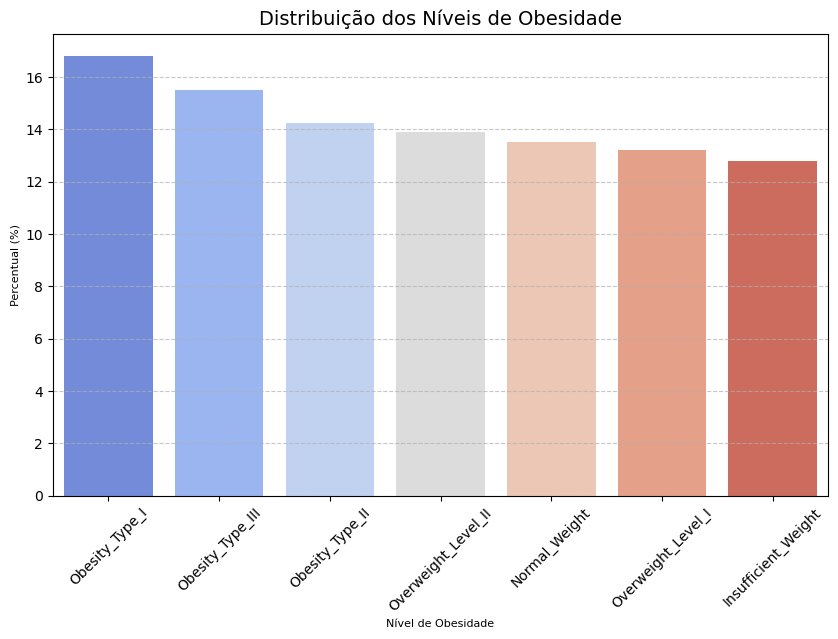

In [18]:
# Visualizando a distribuição
plt.figure(figsize=(10, 6))
sns.barplot(x=obesity_counts.index, y=obesity_counts.values, palette="coolwarm", hue=obesity_counts.index)
plt.xlabel("Nível de Obesidade", fontsize=8)
plt.ylabel("Percentual (%)", fontsize=8)
plt.title("Distribuição dos Níveis de Obesidade", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

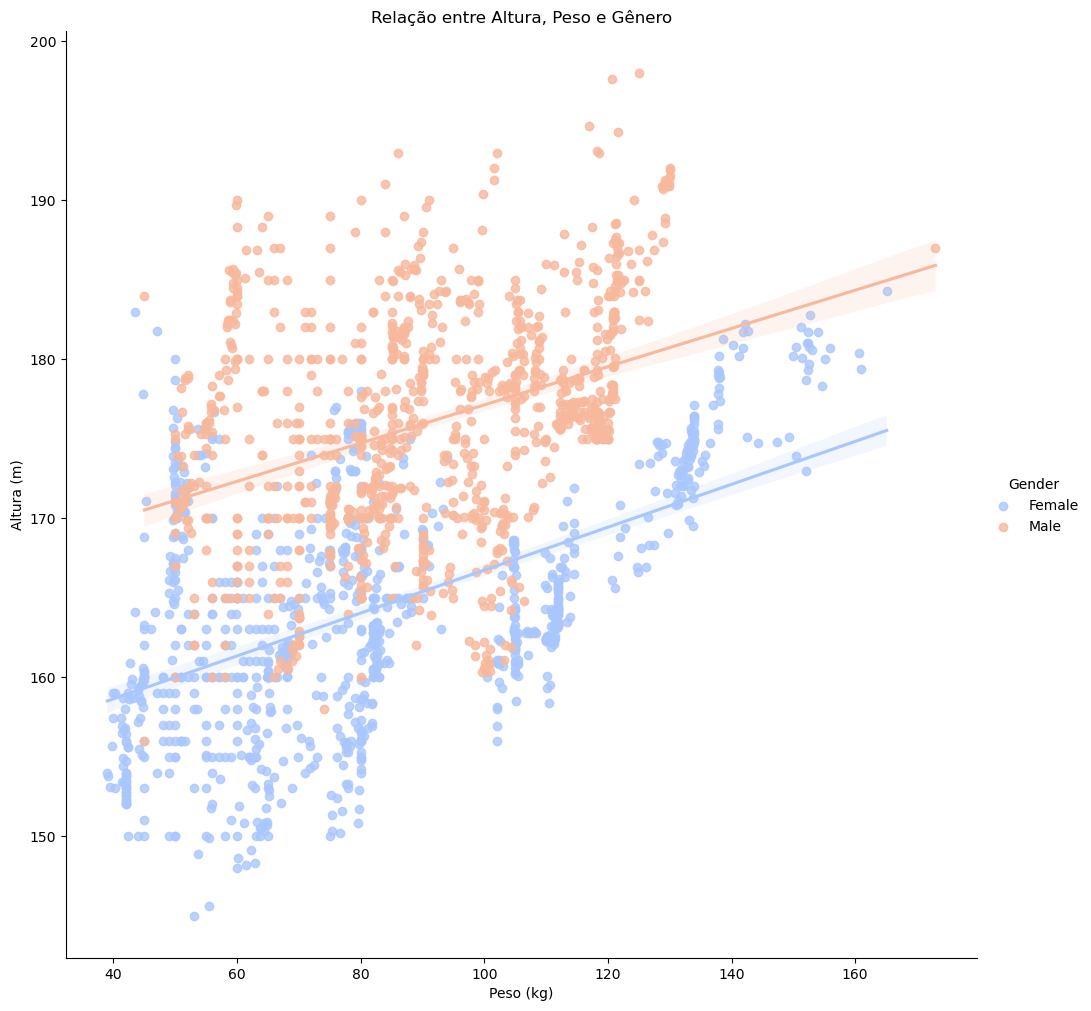

In [19]:
# Relação entre altura x peso - para cada gênero
sns.lmplot(x='Weight', y='Height', data=df2, hue=('Gender'), palette='coolwarm', height=10)
plt.title('Relação entre Altura, Peso e Gênero')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.show()


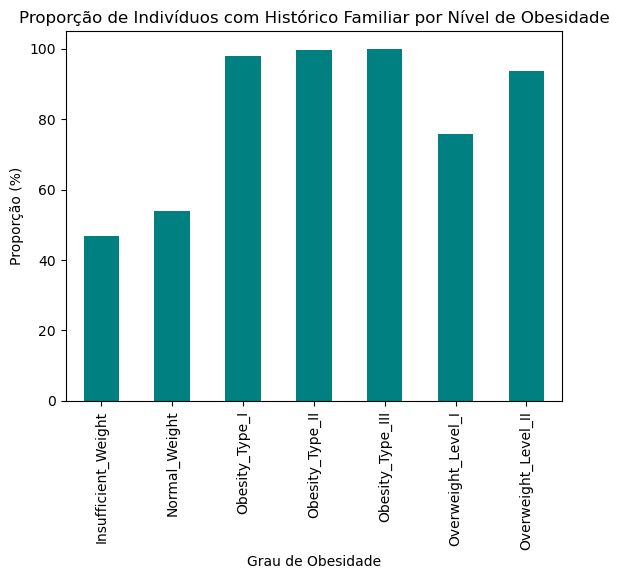

In [20]:
# Proporção por grupo de obesidade
family_history = df2.groupby('Obesity')['Obesity F'].mean().mul(100)

family_history.plot(kind='bar', color='teal')
plt.title('Proporção de Indivíduos com Histórico Familiar por Nível de Obesidade')
plt.ylabel('Proporção (%)',)
plt.xlabel('Grau de Obesidade')
plt.show()

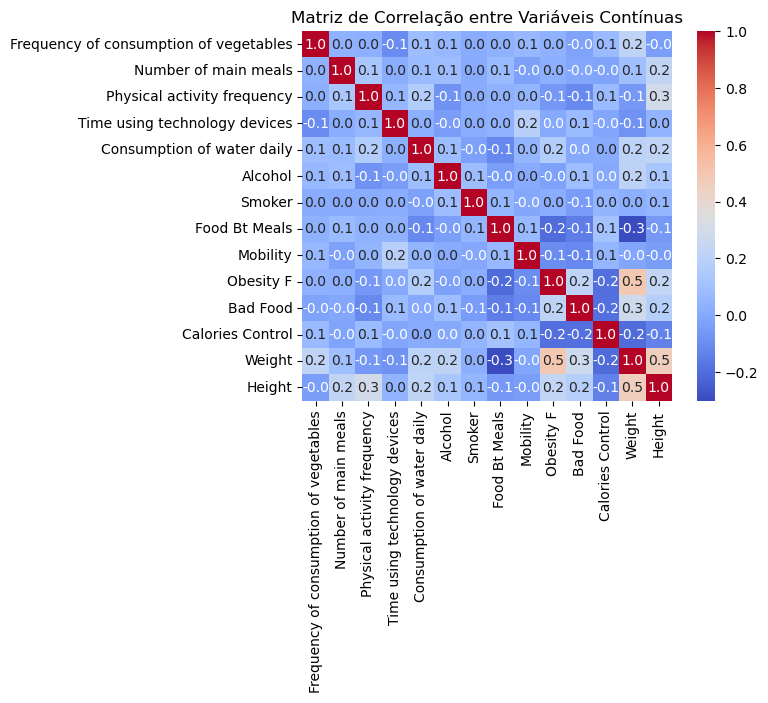

In [21]:
# Validando se há correlação entre as variáveis
# Adicionando as variávies peso e altura ao df de variáveis contínuas

continuous_vars.append('Weight')
continuous_vars.append('Height')

correlation_matrix = df2[continuous_vars].corr()

# Heatmap
#Grau de correção: 0.1 a 0.3 fraca; 0.3 a 0.5 moderada; 0.5 a 1 forte
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)
plt.title('Matriz de Correlação entre Variáveis Contínuas')
plt.show()

maioria dos dados com correlação fracas
correlação forte (0,5)
0.5 - weight / height - peso e altura
- Peso e altura são variáveis utilizadas no cálculo para identificar o tipo obesidade
0.5 - weight / obesity f - peso e tipo de obesidade 
- quanto maior o peso maior propenção para sobrepeso e obesidade

correlação fraca
- 0.3 bad food / wight 

## DF 1 - Dados Qualitativos

In [22]:
df1 = df.copy() # nesse df trabalharemos sem a transformação das variáveis qualitativas

In [23]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Physical activity frequency', 'Time using technology devices', 'Consumption of water daily']:
    df1[x] = df1[x].round(0)
    value = np.array(df1[x])
    print(f'{x}: Valores: {df1[x].unique()}')

Frequency of consumption of vegetables: Valores: [2. 3. 1.]
Number of main meals: Valores: [3. 1. 4. 2.]
Physical activity frequency: Valores: [0. 3. 2. 1.]
Time using technology devices: Valores: [1. 0. 2.]
Consumption of water daily: Valores: [2. 3. 1.]


In [24]:
df1['Frequency of consumption of vegetables'] = df1['Frequency of consumption of vegetables'].map({1: 'Never', 2: 'Sometimes', 3: 'Always'})
df1['Number of main meals'] = df1['Number of main meals'].map({1: '1', 2: '2', 3: '3', 4: '3+'})
df1['Physical activity frequency'] = df1['Physical activity frequency'].map({0: 'Never', 1: '1-2 days', 2: '2-4 days', 3: '4-5 days'})
df1['Time using technology devices'] = df1['Time using technology devices'].map({0: '0–2 hours', 1: '3-5 hours', 2: '+5 hours'})
df1['Consumption of water daily'] = df1['Consumption of water daily'].map({1: 'Less than a liter', 2: 'Between 1 and 2L', 3: 'More than 2L'})
#df1['Obese'] = df1['Obese'].map({0: 'No', 1: 'Yes'})


df1.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity,Obese
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2L,no,Never,3-5 hours,no,Public_Transportation,Normal_Weight,0
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2L,yes,4-5 days,0–2 hours,Sometimes,Public_Transportation,Normal_Weight,0
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2L,no,2-4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight,0
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2L,no,2-4 days,0–2 hours,Frequently,Walking,Overweight_Level_I,0
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2L,no,Never,0–2 hours,Sometimes,Public_Transportation,Overweight_Level_II,1


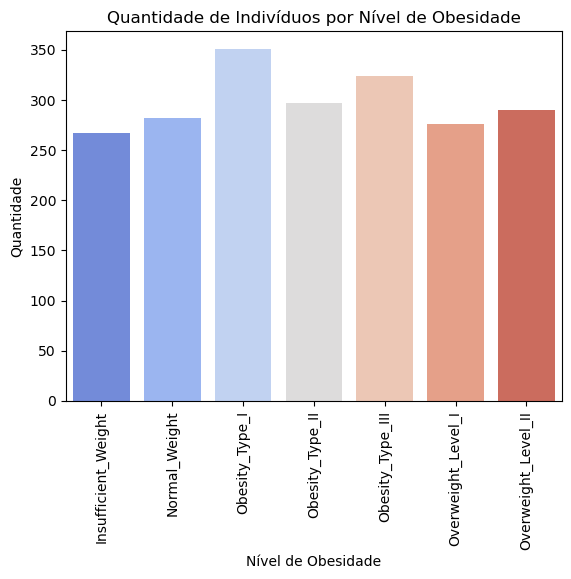

<Figure size 640x480 with 0 Axes>

In [25]:
# Contando a quantidade de indivíduos por nível de obesidade

obesity_count = df1['Obesity'].value_counts().sort_index()

# Visualizando a quantidade de indivíduos por nível de obesidade
sns.barplot(x=obesity_count.index, y=obesity_count.values, palette='coolwarm', hue=obesity_count.index, legend=False)
plt.title('Quantidade de Indivíduos por Nível de Obesidade')
plt.ylabel('Quantidade')
plt.xlabel('Nível de Obesidade')
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

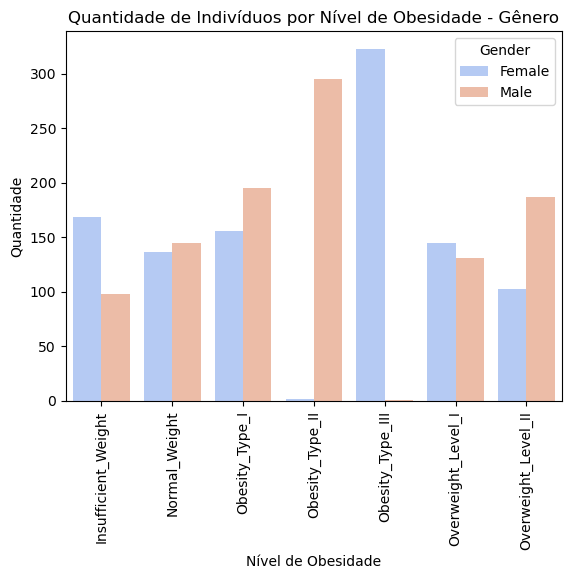

In [26]:
# Segregando os indivíduos por gênero - nível de obesidade
sns.countplot(x='Obesity', data=df1, palette='coolwarm', hue='Gender', legend=True, order=sorted(df1['Obesity'].unique()))
plt.title('Quantidade de Indivíduos por Nível de Obesidade - Gênero')
plt.ylabel('Quantidade')
plt.xlabel('Nível de Obesidade')
plt.xticks(rotation=90)
plt.show()

In [27]:
df1.dtypes

Gender                                        object
Age                                          float64
Height                                       float64
Weight                                       float64
Family History with Overweight                object
Frequent consumption of high caloric food     object
Frequency of consumption of vegetables        object
Number of main meals                          object
Consumption of food between meals             object
Smoke                                         object
Consumption of water daily                    object
Calories consumption monitoring               object
Physical activity frequency                   object
Time using technology devices                 object
Consumption of alcohol                        object
Transportation used                           object
Obesity                                       object
Obese                                          int64
dtype: object

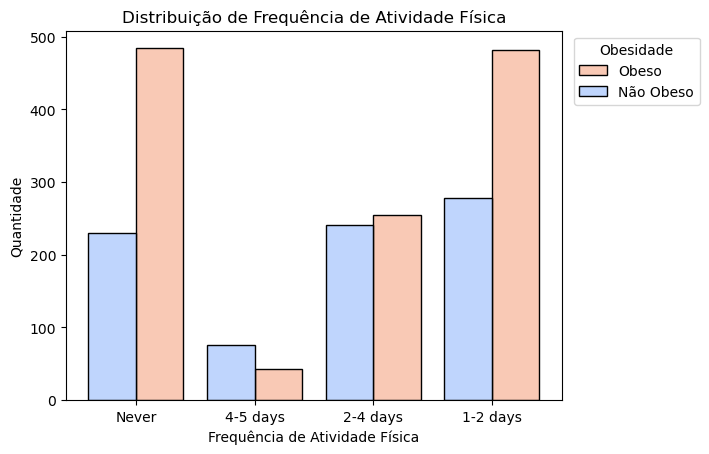

In [28]:
# Frequência de atividade física por gênero

df1['Obese'] = df1['Obese'].astype(str).astype('category')
sns.histplot(x=df1['Physical activity frequency'], kde=False, palette='coolwarm', hue=df1['Obese'], legend=False, multiple="dodge", shrink=.8)
plt.title('Distribuição de Frequência de Atividade Física')
plt.xlabel('Frequência de Atividade Física')
plt.ylabel('Quantidade')
plt.legend(title='Obesidade', labels=['Obeso', 'Não Obeso'], bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()




In [29]:
# Identificando os valores relacionados aos hábitos:
for x in df1.columns[4:16]:
    value = df1[x].value_counts().index.to_list()
    count = df1[x].value_counts().to_list()
    dic = dict(zip(value, count))
    print(f'{x}: \n {dic}')

Family History with Overweight: 
 {'yes': 1722, 'no': 365}
Frequent consumption of high caloric food: 
 {'yes': 1844, 'no': 243}
Frequency of consumption of vegetables: 
 {'Sometimes': 994, 'Always': 991, 'Never': 102}
Number of main meals: 
 {'3': 1466, '1': 296, '2': 176, '3+': 149}
Consumption of food between meals: 
 {'Sometimes': 1761, 'Frequently': 236, 'Always': 53, 'no': 37}
Smoke: 
 {'no': 2043, 'yes': 44}
Consumption of water daily: 
 {'Between 1 and 2L': 1107, 'More than 2L': 502, 'Less than a liter': 478}
Calories consumption monitoring: 
 {'no': 1991, 'yes': 96}
Physical activity frequency: 
 {'1-2 days': 759, 'Never': 714, '2-4 days': 495, '4-5 days': 119}
Time using technology devices: 
 {'0–2 hours': 932, '3-5 hours': 912, '+5 hours': 243}
Consumption of alcohol: 
 {'Sometimes': 1380, 'no': 636, 'Frequently': 70, 'Always': 1}
Transportation used: 
 {'Public_Transportation': 1558, 'Automobile': 456, 'Walking': 55, 'Motorbike': 11, 'Bike': 7}


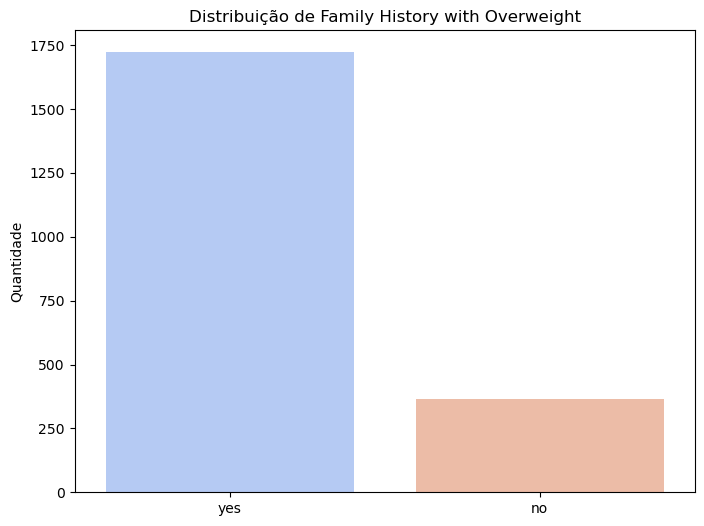

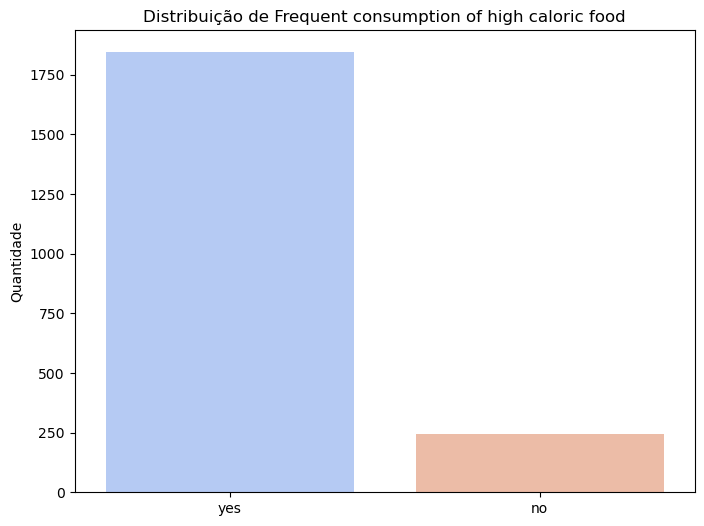

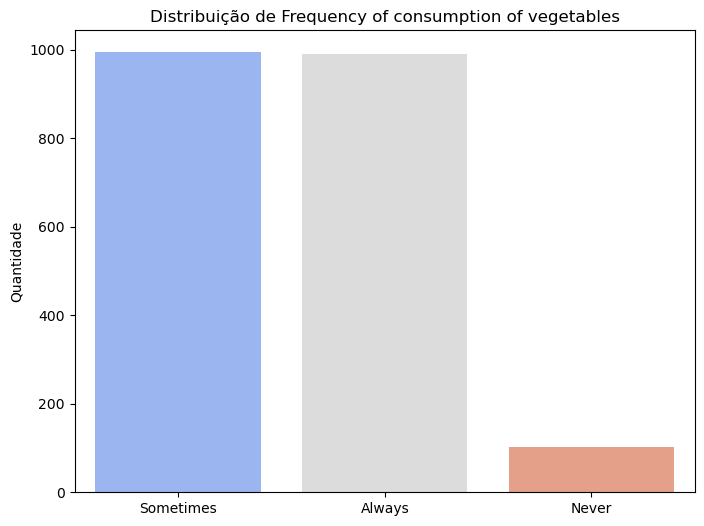

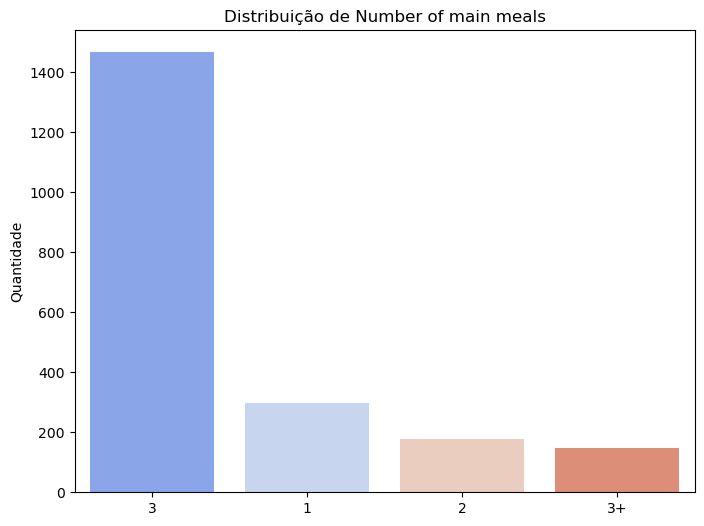

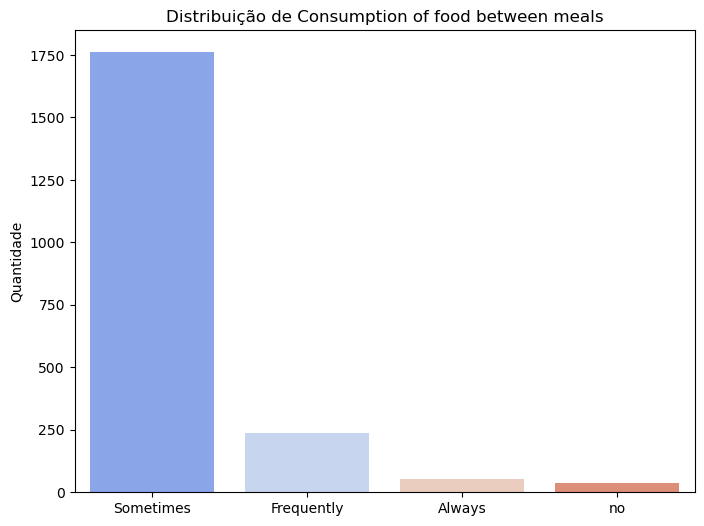

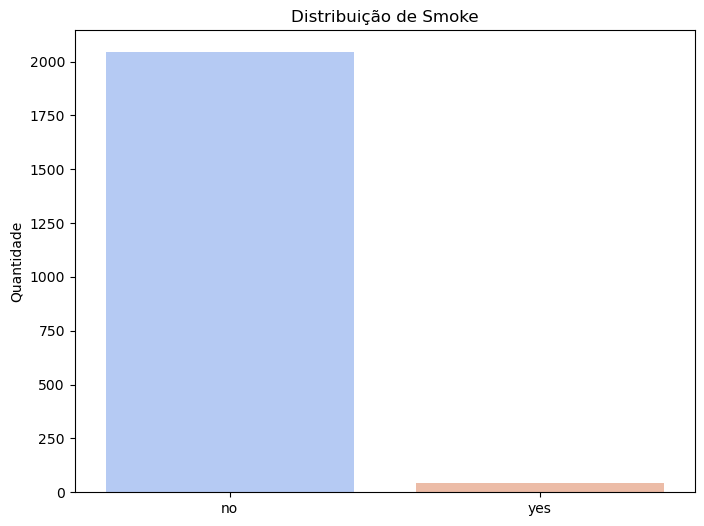

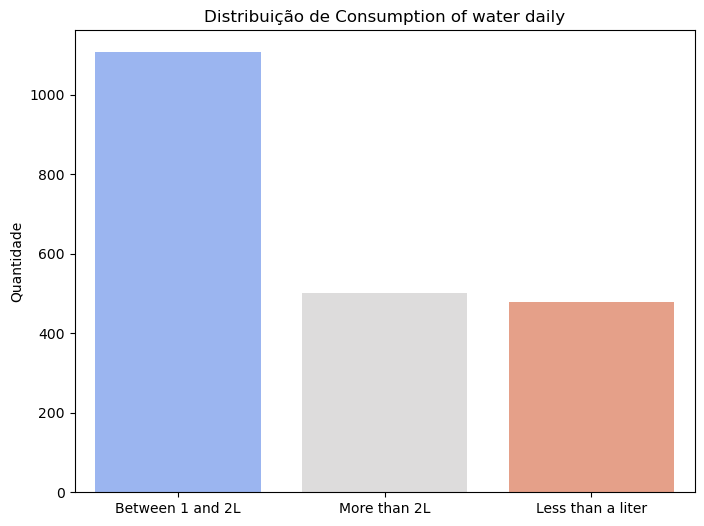

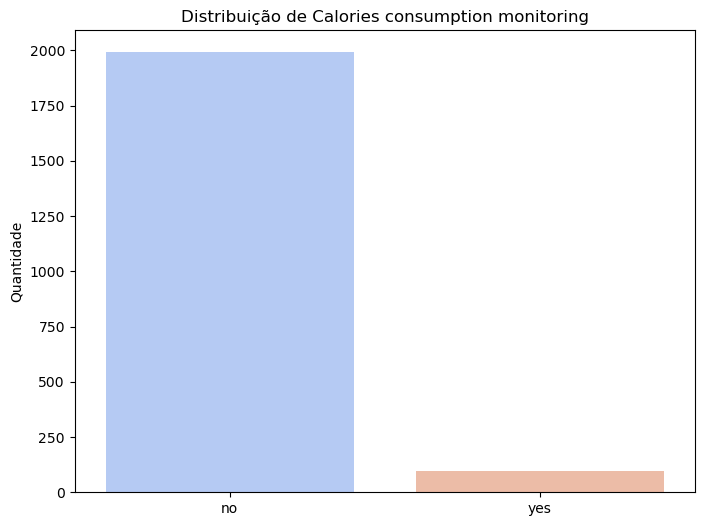

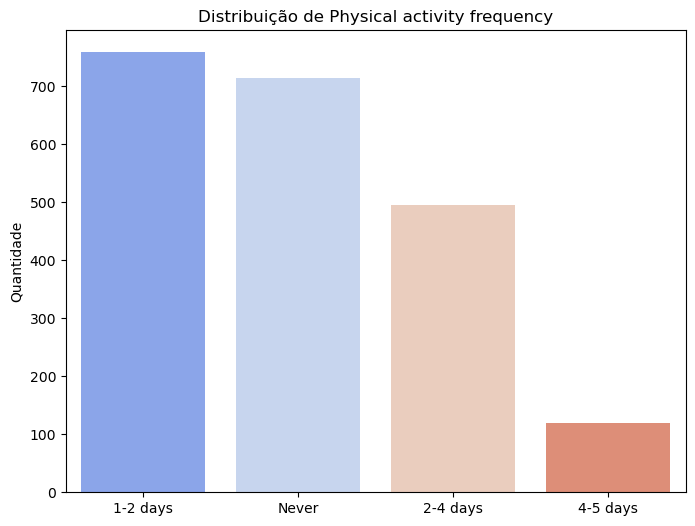

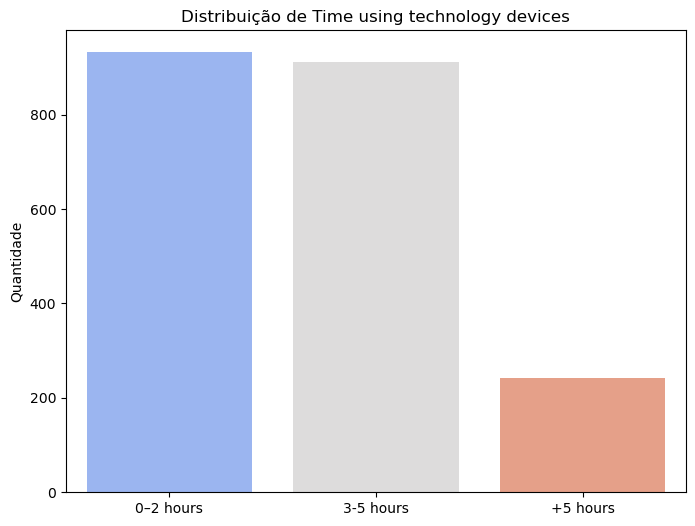

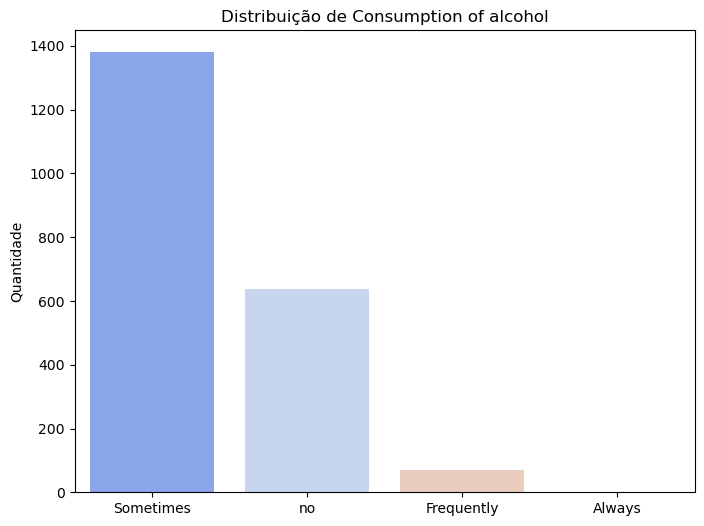

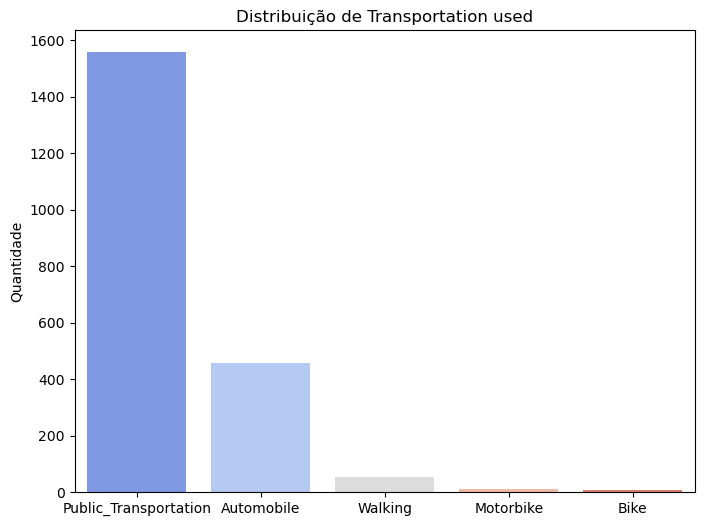

In [30]:
# Plotando váriveis qualitativas - EDA
for x in df.columns[4:16]:
    plt.figure(figsize = (8,6))
    ax = sns.barplot(x=df1[x].value_counts().index.to_list(), y=df1[x].value_counts().to_list(), palette='coolwarm', hue=df1[x].value_counts().index.to_list(), legend=False)

    plt.title(f'Distribuição de {x}')
    plt.ylabel('Quantidade')
    

## PCA

In [31]:
df.dtypes

Gender                                        object
Age                                          float64
Height                                       float64
Weight                                       float64
Family History with Overweight                object
Frequent consumption of high caloric food     object
Frequency of consumption of vegetables       float64
Number of main meals                         float64
Consumption of food between meals             object
Smoke                                         object
Consumption of water daily                   float64
Calories consumption monitoring               object
Physical activity frequency                  float64
Time using technology devices                float64
Consumption of alcohol                        object
Transportation used                           object
Obesity                                       object
Obese                                          int64
dtype: object

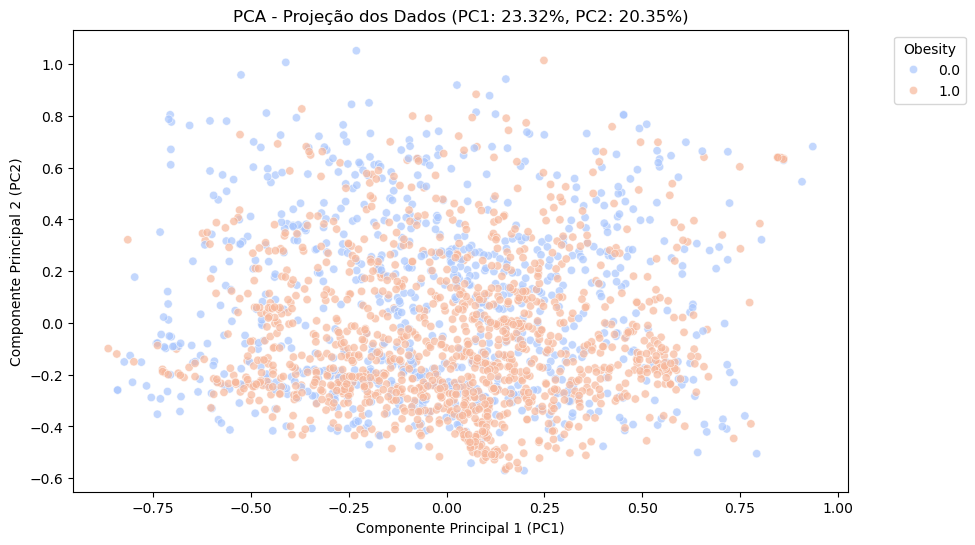

In [61]:
# Variáveis numéricas para o PCA (DF Base)
num_vars = ["Age", "Height", "Weight", "Frequency of consumption of vegetables", "Number of main meals", "Consumption of water daily", "Physical activity frequency", "Time using technology devices"]

# Normalizando os dados com StandardScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[num_vars])

# PCA
pca = PCA(n_components=2)  # Reduzindo para 2 componentes para visualização
principal_components = pca.fit_transform(df_scaled)

# DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
df_pca["Obese"] = df["Obese"]  # Variável alvo para análise


explained_variance = pca.explained_variance_ratio_

# Gráfico da projeção PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Obese"], palette="coolwarm", alpha=0.7)
plt.title(f"PCA - Projeção dos Dados (PC1: {explained_variance[0]*100:.2f}%, PC2: {explained_variance[1]*100:.2f}%)")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.legend(title="Obesity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Preparação DF Final

In [33]:
df_final = df.copy()

In [34]:
# Codificação das variáveis categóricas

categorical_cols = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food',
                    'Consumption of food between meals', 'Smoke', 'Calories consumption monitoring',
                    'Consumption of alcohol', 'Transportation used', 'Obesity']

# Label Encoding para a variável target ('Obesity')
label_encoder = LabelEncoder()
df_final['Obesity'] = label_encoder.fit_transform(df_final['Obesity'])

df_final = pd.get_dummies(df_final, columns=[col for col in categorical_cols if col != 'Obesity'], drop_first=True)


In [35]:
# Divisão em treino e teste (80% treino, 20% teste)

X = df_final.drop(columns=['Obesity'])
y = df_final['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1669, 24), (418, 24), (1669,), (418,))

In [36]:
# Normalização das variáveis numéricas

numerical_cols = ['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
                  'Number of main meals', 'Consumption of water daily', 'Physical activity frequency',
                  'Time using technology devices']

scaler = MinMaxScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])


## Selecionando o Modelo Analítico

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [39]:
# Regressão Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

/home/joaosilva/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.58159722222221, 0.5, 'Real')

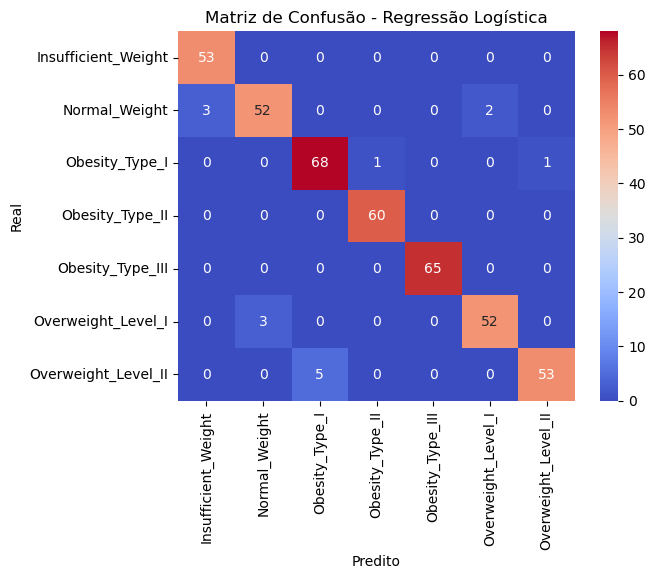

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Predito")
plt.ylabel("Real")

In [41]:
# Arvore de Decisão

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

Text(50.58159722222221, 0.5, 'Real')

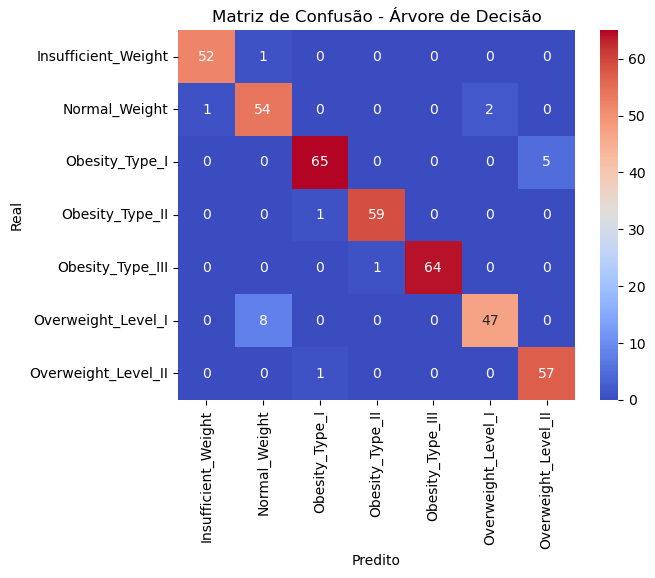

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.xlabel("Predito")
plt.ylabel("Real")

In [ ]:
# Random Forest

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test) 

Text(50.58159722222221, 0.5, 'Real')

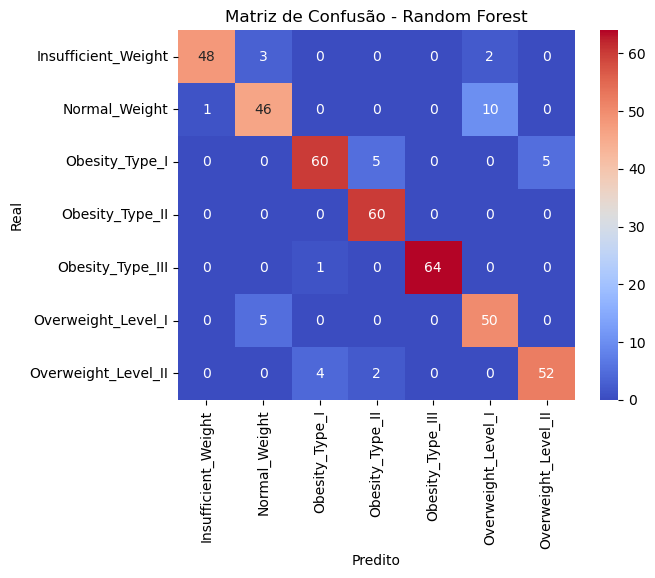

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")

In [45]:
# SVM

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Text(50.58159722222221, 0.5, 'Real')

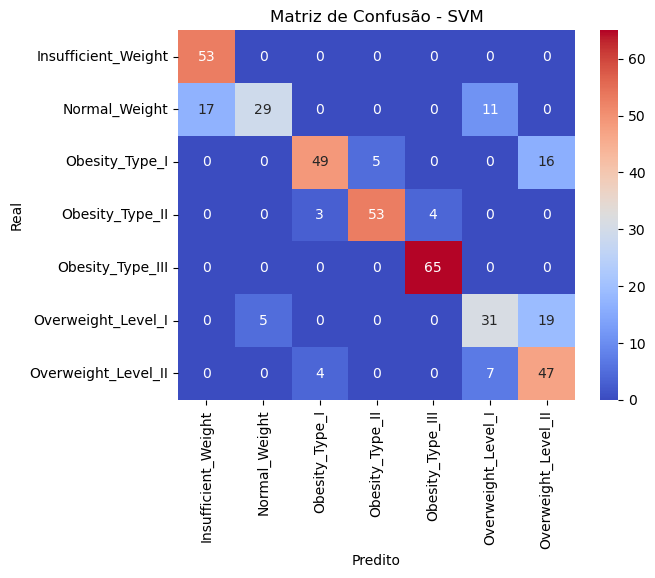

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Predito")
plt.ylabel("Real")

# Avaliando Modelos

In [47]:
results = {
    "Regressão Logística": accuracy_score(y_test, y_pred_logistic),
    "Árvore de Decisão": accuracy_score(y_test, y_pred_tree),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

pd.DataFrame(results, index=["Acurácia"]).T

,Acurácia
Regressão Logística,0.964115
Árvore de Decisão,0.952153
Random Forest,0.909091
SVM,0.782297


In [48]:
# Importando as métricas necessárias
from sklearn.metrics import classification_report

# Criando um dicionário para armazenar os relatórios de cada modelo
classification_reports = {
    "Regressão Logística": classification_report(y_test, y_pred_logistic, output_dict=True),
    "Árvore de Decisão": classification_report(y_test, y_pred_tree, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True),
    "SVM": classification_report(y_test, y_pred_svm, output_dict=True)
}

# Convertendo os resultados em DataFrame para melhor visualização
df_reports = {}
for model, report in classification_reports.items():
    df_reports[model] = pd.DataFrame(report).transpose()

In [49]:
# Exibindo os relatórios para cada modelo
for model, df_report in df_reports.items():
    print(f"\n\n{model}\n")
    print(df_report)





Regressão Logística

              precision    recall  f1-score     support
0              0.946429  1.000000  0.972477   53.000000
1              0.945455  0.912281  0.928571   57.000000
2              0.931507  0.971429  0.951049   70.000000
3              0.983607  1.000000  0.991736   60.000000
4              1.000000  1.000000  1.000000   65.000000
5              0.962963  0.945455  0.954128   55.000000
6              0.981481  0.913793  0.946429   58.000000
accuracy       0.964115  0.964115  0.964115    0.964115
macro avg      0.964492  0.963280  0.963484  418.000000
weighted avg   0.964503  0.964115  0.963917  418.000000


Árvore de Decisão

              precision    recall  f1-score     support
0              0.981132  0.981132  0.981132   53.000000
1              0.857143  0.947368  0.900000   57.000000
2              0.970149  0.928571  0.948905   70.000000
3              0.983333  0.983333  0.983333   60.000000
4              1.000000  0.984615  0.992248   65.000000
5   

In [50]:
# Extraindo o Recall médio correto para cada modelo
recall_scores = {
    "Regressão Logística": df_reports["Regressão Logística"].loc["weighted avg", "recall"],
    "Árvore de Decisão": df_reports["Árvore de Decisão"].loc["weighted avg", "recall"],
    "Random Forest": df_reports["Random Forest"].loc["weighted avg", "recall"],
    "SVM": df_reports["SVM"].loc["weighted avg", "recall"]
}

# Criando DataFrame para visualização
recall_df = pd.DataFrame(list(recall_scores.items()), columns=["Modelo", "Recall Médio"])


In [51]:
# Exibir os resultados do Recall Médio
recall_df

,Modelo,Recall Médio
0,Regressão Logística,0.964115
1,Árvore de Decisão,0.952153
2,Random Forest,0.909091
3,SVM,0.782297


In [52]:
# Extraindo o F-1 score médio correto para cada modelo
f1_scores = {
    "Regressão Logística": df_reports["Regressão Logística"].loc["weighted avg", "f1-score"],
    "Árvore de Decisão": df_reports["Árvore de Decisão"].loc["weighted avg", "f1-score"],
    "Random Forest": df_reports["Random Forest"].loc["weighted avg", "f1-score"],
    "SVM": df_reports["SVM"].loc["weighted avg", "f1-score"]
}

# Criando DataFrame para visualização
f1_df = pd.DataFrame(list(f1_scores.items()), columns=["Modelo", "F1-Score Médio"])


In [53]:
# Exibir os resultados do F-1 Score médio
f1_df

,Modelo,F1-Score Médio
0,Regressão Logística,0.963917
1,Árvore de Decisão,0.952227
2,Random Forest,0.909085
3,SVM,0.777843


In [54]:
# Validando as métricas escolhidas
df_avaliation = pd.merge(recall_df, f1_df)

In [56]:
# Com base nas métricas escolhidas, o modelo Random Forest foi o que obteve o melhor desempenho (Recall e F-1 Score médio)
df_avaliation

,Modelo,Recall Médio,F1-Score Médio
0,Regressão Logística,0.964115,0.963917
1,Árvore de Decisão,0.952153,0.952227
2,Random Forest,0.909091,0.909085
3,SVM,0.782297,0.777843
